> Dimension reduction summarizes a dataset using its common occuring patterns. In this chapter, you'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, you'll employ a variant of PCA will allow you to cluster Wikipedia articles by their content!

# Wines dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import pandas as pd
wines = pd.read_csv('wine.zip')
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   class_name            178 non-null    object 
 2   alcohol               178 non-null    float64
 3   malic_acid            178 non-null    float64
 4   ash                   178 non-null    float64
 5   alcalinity_of_ash     178 non-null    float64
 6   magnesium             178 non-null    int64  
 7   total_phenols         178 non-null    float64
 8   flavanoids            178 non-null    float64
 9   nonflavanoid_phenols  178 non-null    float64
 10  proanthocyanins       178 non-null    float64
 11  color_intensity       178 non-null    float64
 12  hue                   178 non-null    float64
 13  od280                 178 non-null    float64
 14  proline               178 non-null    int64  
dtypes: float64(11), int64(3

`total_phenols`and `od280` are correlated

In [2]:
from scipy.stats import pearsonr
# This function also performs a test of the null hypothesis that the distributions underlying the samples are uncorrelated and normally distributed.
pearson = pearsonr(wines.total_phenols, wines.od280)
print(pearson)
pearson.confidence_interval()

PearsonRResult(statistic=0.6999493647911861, pvalue=1.5939800322023109e-27)


ConfidenceInterval(low=0.6163154823403337, high=0.7679701231645452)

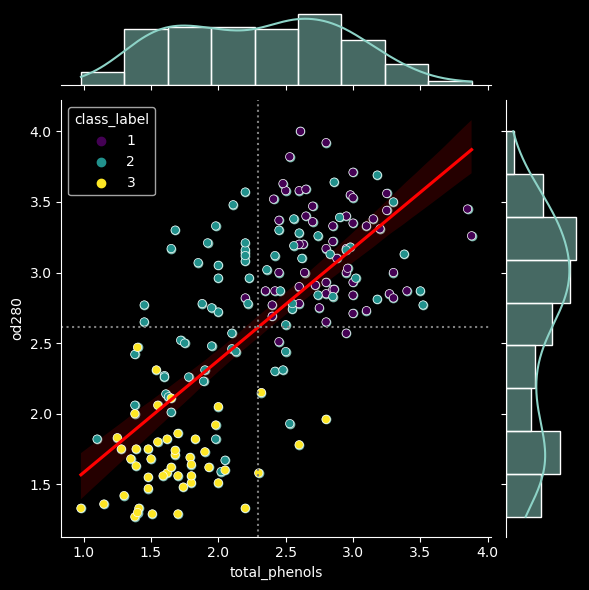

In [3]:
sns.jointplot(data=wines, x='total_phenols', y='od280', palette='viridis', kind='reg', line_kws={"color": "red"})
sns.scatterplot(data=wines, x='total_phenols', y='od280', hue='class_label', palette='viridis')
plt.axvline(wines.total_phenols.mean(), color='gray', linestyle=':')
plt.axhline(wines.od280.mean(), color='gray', linestyle=':')
plt.show()

`total_phenols`and `od280` have different correlation among classes

/home/mauricio/miniconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


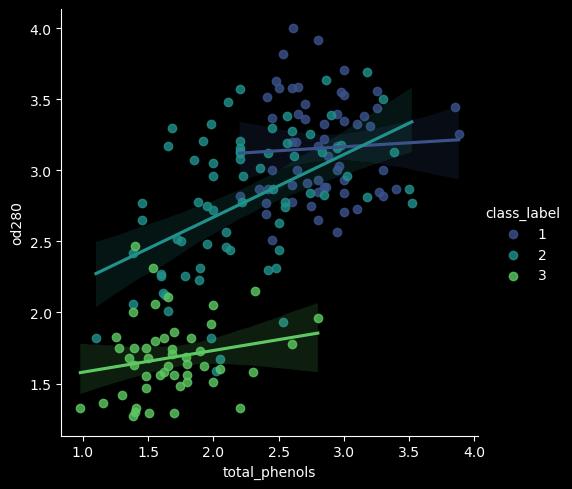

In [4]:
sns.lmplot(data=wines, x='total_phenols', y='od280', palette='viridis', hue='class_label')
plt.show()

`total_phenols`and `od280` have different distributions among classes

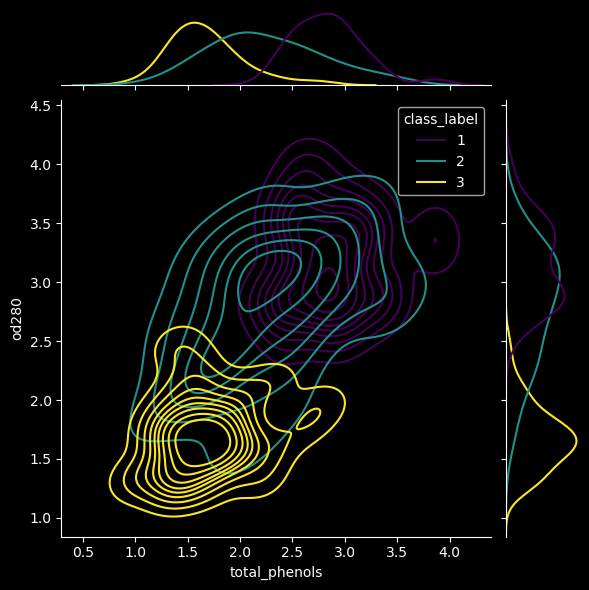

In [5]:
sns.jointplot(data=wines, x='total_phenols', y='od280', hue='class_label', palette='viridis', kind='kde')

## PCA visualization

PCA aligns data with axes
* Rotates data samples to be aligned with axes
* Shifts data samples so they have mean 0
* No information is lost

In [6]:
from sklearn.decomposition import PCA
model=PCA()
samples = wines[['total_phenols', 'od280']]
model.fit(samples)
transformed = model.transform(samples)

/tmp/ipykernel_35950/643762542.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=transformed[:,0], y=transformed[:,1], c=wines.class_label, palette='viridis')


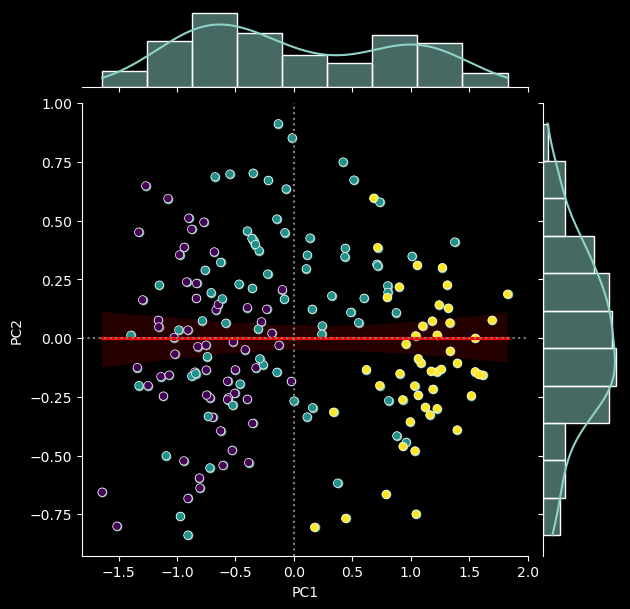

In [7]:
sns.jointplot(x=transformed[:,0], y=transformed[:,1], palette='viridis', kind='reg', line_kws={"color": "red"})
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], c=wines.class_label, palette='viridis')
plt.axvline(transformed[:,0].mean(), color='gray', linestyle=':')
plt.axhline(transformed[:,1].mean(), color='gray', linestyle=':')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

## PCA features are uncorrelated

In [8]:
pearson = pearsonr(transformed[:,0], transformed[:,1])
print(f'{pearson.statistic=:0.16f} {pearson.pvalue=}')
pearson.confidence_interval()

pearson.statistic=0.0000000000000003 pearson.pvalue=0.9999999999999978


ConfidenceInterval(low=-0.14708469440334374, high=0.14708469440334426)

## Principal Components

Principal axes in feature space, representing the directions of maximum variance in the data.

In [9]:
print(model.components_)

[[-0.64116665 -0.76740167]
 [-0.76740167  0.64116665]]


## The first principal component

The first principal component of the data is the direction in which the data varies the most.

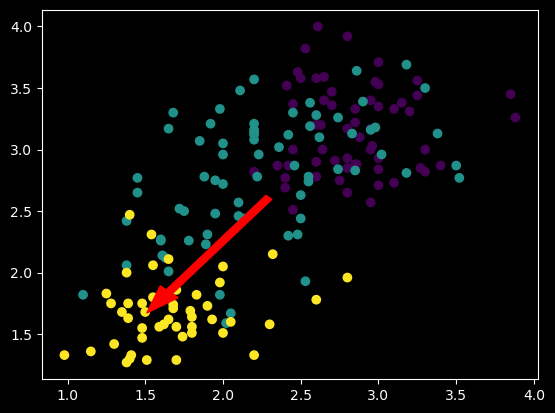

In [10]:
first_pc = model.components_[0, :]
plt.scatter(wines.total_phenols, wines.od280, c=wines.class_label)
plt.arrow(model.mean_[0], model.mean_[1], first_pc[0], first_pc[1], color='red', width=0.05)
plt.show()

# Grain dataset

In [11]:
import pandas as pd
grains = pd.read_csv('Grains/seeds.zip', header=None)\
    .set_axis(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
               'asymmetry_coefficient', 'kernel_groove_length', 'variety'], axis=1)
grains

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


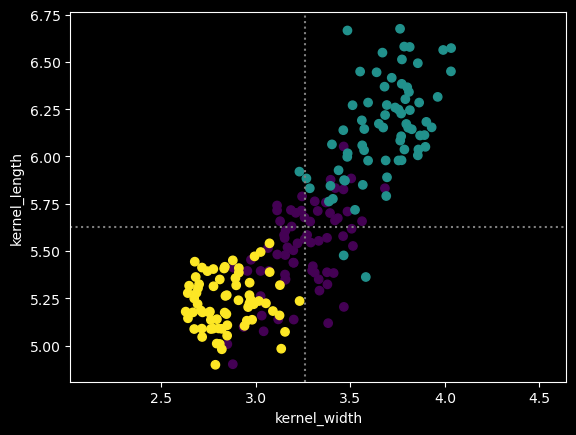

PearsonRResult(statistic=0.860414937714347, pvalue=8.121332906191608e-63)

In [12]:
plt.scatter(grains.kernel_width, grains.kernel_length, c=grains.variety)
plt.axis('equal')
plt.xlabel('kernel_width')
plt.ylabel('kernel_length')
plt.axvline(grains.kernel_width.mean(), color='gray', linestyle=':')
plt.axhline(grains.kernel_length.mean(), color='gray', linestyle=':')
plt.show()

pearsonr(grains.kernel_width, grains.kernel_length)

## PCA visualization

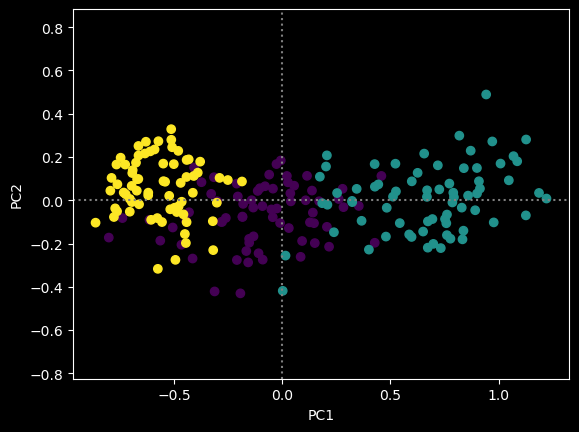

In [13]:
model = PCA()
pca_features = model.fit_transform(grains[['kernel_width', 'kernel_length']])
xs = pca_features[:,0]
ys = pca_features[:,1]
plt.scatter(xs, ys, c=grains.variety)
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axvline(pca_features[:,0].mean(), color='gray', linestyle=':')
plt.axhline(pca_features[:,1].mean(), color='gray', linestyle=':')
plt.show()

## PCA features are uncorrelated

In [14]:
pearsonr(xs, ys)

PearsonRResult(statistic=9.262501671949036e-17, pvalue=0.999999999999998)

## The first principal component

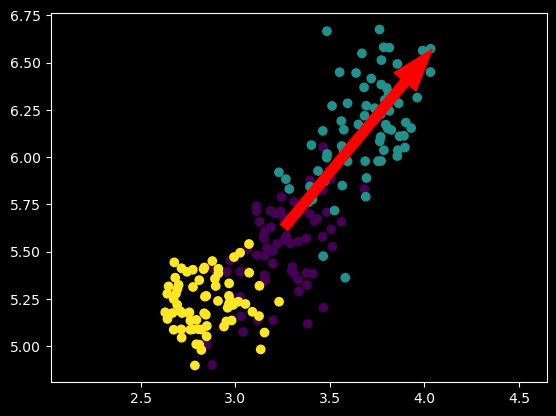

In [15]:
plt.scatter(grains.kernel_width, grains.kernel_length, c=grains.variety)
model = PCA()
model.fit(grains[['kernel_width', 'kernel_length']])
mean = model.mean_
first_pc = model.components_[0, :]
# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.05)
# Keep axes on same scale
plt.axis('equal')
plt.show()

# Iris versicolor dataset with 3 features

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
versicolor = iris.data[iris.target_names[iris.target] == 'versicolor'][:, [0,1,3]]

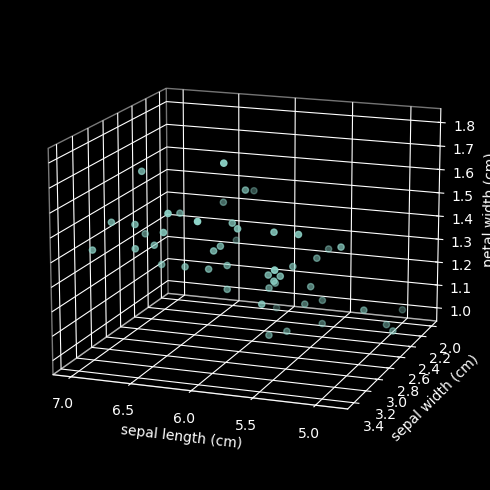

In [19]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(versicolor[:,0], versicolor[:,1], versicolor[:,2])
ax.xaxis.pane.fill, ax.yaxis.pane.fill, ax.zaxis.pane.fill = [False]*3
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[3])
ax.view_init(elev=15, azim=110)
plt.tight_layout()
plt.show()

## Plotting the variances of PCA features

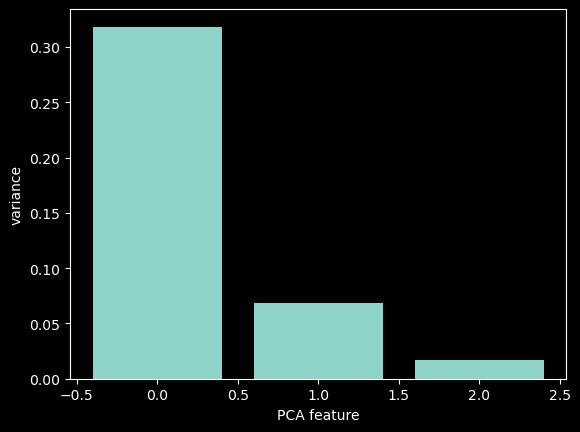

In [20]:
model = PCA()
model.fit(versicolor)
plt.bar(range(model.n_components_), model.explained_variance_)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

## Plotting the PCA features

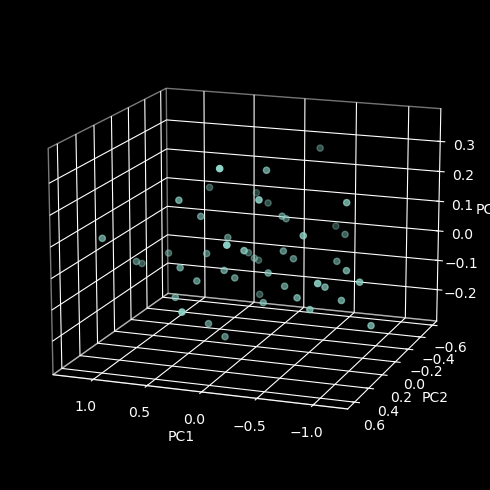

In [21]:
pca_transformed = model.fit_transform(versicolor)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_transformed[:,0], pca_transformed[:,1], pca_transformed[:,2])
ax.xaxis.pane.fill, ax.yaxis.pane.fill, ax.zaxis.pane.fill = [False]*3
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=15, azim=110)
plt.tight_layout()
plt.show()

# Fish

http://jse.amstat.org/jse_data_archive.htm

In [22]:
fish = pd.read_csv('fish.zip', header=None).set_axis(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height%', 'Width%'], axis=1)
fish

,Species,Weight,Length1,Length2,Length3,Height%,Width%
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


## Plotting the variances of PCA features

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

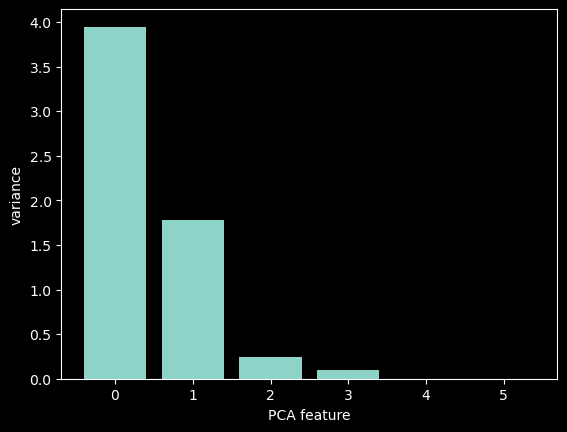

In [24]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
samples = fish.iloc[:, 1:]
pipeline.fit(samples)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

# Iris dataset

In [25]:
pca = PCA(n_components=2)
pca.fit(iris.data)

PCA(n_components=2)

In [26]:
transformed = pca.transform(iris.data)
transformed.shape

(150, 2)

## Iris dataset in 2 dimensions

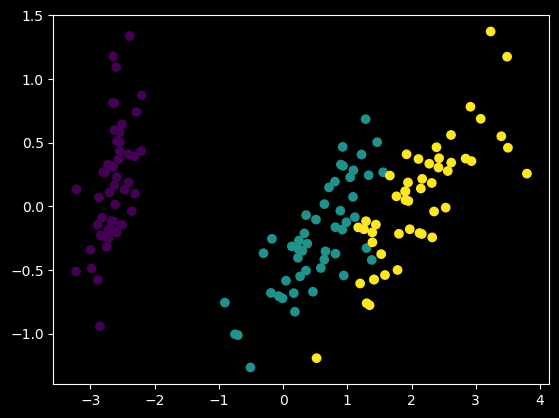

In [27]:
plt.scatter(transformed[:,0], transformed[:,1], c=iris.target)
plt.show()

# Word frequency arrays

In some cases, an alternative implementation of PCA needs to be used. Word frequency arrays are a great example.

Scikit-learn's PCA doesn't support csr_matrices, and you'll need to use TruncatedSVD instead. TruncatedSVD performs the same transformation as PCA, but accepts csr matrices as input.

> **In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in `sklearn.feature_extraction.text`. In that context, it is known as latent semantic analysis (LSA).**

## A tf-idf word-frequency array

In [28]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
for doc in documents:
    print(doc)

cats say meow
dogs say woof
dogs chase cats


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(documents)
display(csr_mat)

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [30]:
pd.DataFrame(csr_mat.toarray(), columns=tfidf.get_feature_names_out())

,cats,chase,dogs,meow,say,woof
0,0.517856,0.000000,0.000000,0.680919,0.517856,0.000000
1,0.000000,0.000000,0.517856,0.000000,0.517856,0.680919
2,0.517856,0.680919,0.517856,0.000000,0.000000,0.000000


## Wikipedia dataset

https://blog.lateral.io/2015/06/the-unknown-perils-of-mining-wikipedia/

It's a word frequency array of some Wikipedia articles where rows are words and columns are articles

In [31]:
words = pd.read_csv('Wikipedia articles/wikipedia-vocabulary-utf8.zip', header=None)[0].tolist()
wikipedia = pd.read_csv('Wikipedia articles/wikipedia-vectors.zip', index_col=0).set_axis(words).rename_axis('words').rename_axis('articles', axis=1)
wikipedia

articles,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
words,,,,,,,,,,,,,,,,,,,,,
aaron,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.000000,0.0
abandon,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.006110,0.0
abandoned,0.0,0.029607,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
abandoning,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.000000,0.0
abandonment,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zimbabwe,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
zinc,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
zone,0.0,0.000000,0.011594,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0


## Clustering Wikipedia Articles

### Creating a pipeline of TruncatedSVD and KMeans

In [32]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
svd = TruncatedSVD(n_components=50)
kmeans = KMeans(n_clusters=6, n_init='auto')
pipeline = make_pipeline(svd, kmeans)
pipeline

Pipeline(steps=[('truncatedsvd', TruncatedSVD(n_components=50)),
                ('kmeans', KMeans(n_clusters=6, n_init='auto'))])

In [40]:
step1 = svd.fit_transform(csr_matrix(wikipedia.transpose()))
step1.shape

(60, 50)

In [42]:
step2 = kmeans.fit_transform(step1)
step2.shape

(60, 6)

### Fit articles and predict Wikipedia clusters

**IMPORTANT: Transposing the dataframe so articles become rows as we want to cluster on articles (DTF)**

In [33]:
from scipy.sparse import csr_matrix
articles = csr_matrix(wikipedia.transpose())
articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

In [34]:
pipeline.fit(articles)
labels = pipeline.predict(articles)
df = pd.DataFrame({'label': labels, 'article': wikipedia.columns.tolist()}).sort_values('label')
df

,label,article
30,0,France national football team
31,0,Cristiano Ronaldo
37,0,Football
36,0,2014 FIFA World Cup qualification
35,0,Colombia national football team
34,0,Zlatan Ibrahimović
33,0,Radamel Falcao
32,0,Arsenal F.C.
39,0,Franck Ribéry
38,0,Neymar


### Measuring clustering quality

In [35]:
pipeline[1].inertia_

35.04528089243045